In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [121]:
df = pd.read_csv("salaries.csv")

### Data Cleaning Phase 1
###### Here we will begin cleaning and evaluating the data, we want to understand our dataset and make sure our data is accurate, and ready to be used for Machine Learning Applications

In [122]:
# Start by looking at shape of our dataframe to see columns and rows
print(df.shape)

(88584, 11)


In [123]:
# Next get a quick summary of numerical counts such as mean, count, SD, min, max and quantiles
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,88584.000000,8.858400e+04,88584.000000,88584.000000
mean,2024.034758,1.619323e+05,157567.798417,21.286011
std,0.620370,1.965317e+05,73531.373158,40.831018
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,106097.250000,0.000000
50%,2024.000000,1.470000e+05,146307.000000,0.000000
75%,2024.000000,1.995000e+05,198600.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [124]:
# Summary statistics for categorical columns
print(df.describe(include=['object']))


       experience_level employment_type       job_title salary_currency  \
count             88584           88584           88584           88584   
unique                4               4             312              26   
top                  SE              FT  Data Scientist             USD   
freq              51596           88111           13156           83994   

       employee_residence company_location company_size  
count               88584            88584        88584  
unique                 96               90            3  
top                    US               US            M  
freq                79705            79762        85667  


In [125]:
# Check data types of the columns
print(df.dtypes)


work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


In [126]:
# Check for missing values in the DataFrame
print(df.isnull().sum())


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


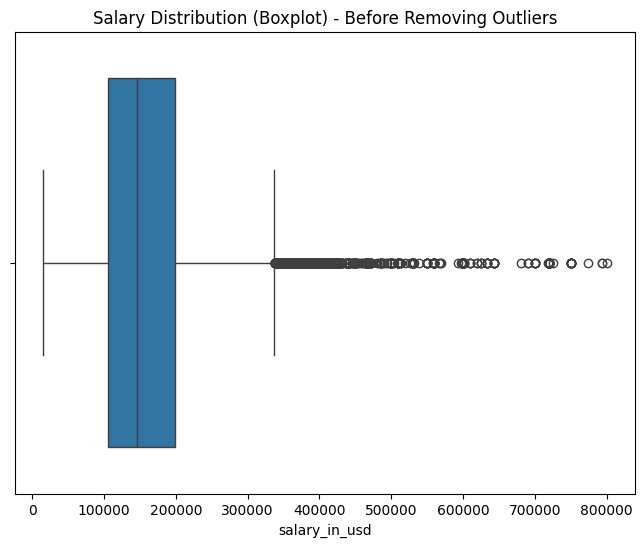

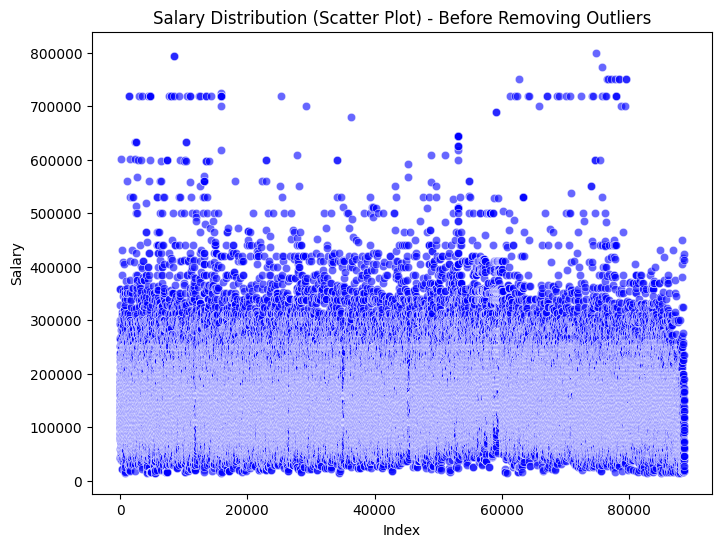

In [127]:
# Here we want to look at the outliers based on salary column and we are going to see
# if we need to delete any outliers

# first we will visualize to get a better understanding of the distribution of our salary column


# Boxplot to visualize the distribution of the salary column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Salary Distribution (Boxplot) - Before Removing Outliers')
plt.show()

# Alternatively, you can plot the data with the salary values marked
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.index, y=df['salary_in_usd'], color='blue', alpha=0.6)
plt.title('Salary Distribution (Scatter Plot) - Before Removing Outliers')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.show()



In [128]:
# Step 1: Calculate the IQR for the 'salary' column
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define the lower and upper bounds for salary
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Find the outliers (rows that will be removed)
outliers = df[(df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)]

# Step 4: Filter the dataset to remove outliers
df_cleaned = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]

# Step 5: Check how many rows were removed
print(f"Rows removed: {len(outliers)}")

# Step 6: Display the removed rows (outliers)
print("Removed Rows (Outliers):")
print(outliers)

# Optionally, display the cleaned data
print("Cleaned Data (After Removing Outliers):")
print(df_cleaned.head())



Rows removed: 1750
Removed Rows (Outliers):
       work_year experience_level employment_type  \
30          2025               EN              FT   
32          2025               EN              FT   
190         2025               SE              FT   
264         2025               SE              FT   
342         2025               SE              FT   
...          ...              ...             ...   
88314       2022               SE              FT   
88366       2020               MI              FT   
88511       2021               EX              CT   
88576       2021               MI              FT   
88579       2020               SE              FT   

                                job_title  salary salary_currency  \
30                     Research Scientist  358000             USD   
32                     Research Scientist  358000             USD   
190                              Engineer  600593             USD   
264                              Engineer  

In [129]:
# Here we remove all duplicates from the dataset 

# Remove exact duplicates from the dataset
df_cleaned_no_duplicates = df_cleaned.drop_duplicates()

# Check how many rows were removed
print(f"Rows removed: {len(df_cleaned) - len(df_cleaned_no_duplicates)}")

# Optionally, view the first few rows of the cleaned data (without duplicates)
print(df_cleaned_no_duplicates.head())


Rows removed: 43533
   work_year experience_level employment_type                 job_title  \
0       2025               MI              FT  Customer Success Manager   
1       2025               SE              FT                  Engineer   
2       2025               SE              FT                  Engineer   
3       2025               SE              FT         Applied Scientist   
4       2025               SE              FT         Applied Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   57000             EUR          60000                 NL            50   
1  165000             USD         165000                 US             0   
2  109000             USD         109000                 US             0   
3  294000             USD         294000                 US             0   
4  137600             USD         137600                 US             0   

  company_location company_size  
0               NL            L 

In [130]:
df_cleaned_no_duplicates

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Customer Success Manager,57000,EUR,60000,NL,50,NL,L
1,2025,SE,FT,Engineer,165000,USD,165000,US,0,US,M
2,2025,SE,FT,Engineer,109000,USD,109000,US,0,US,M
3,2025,SE,FT,Applied Scientist,294000,USD,294000,US,0,US,M
4,2025,SE,FT,Applied Scientist,137600,USD,137600,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
88578,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
88580,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
88581,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
88582,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


### Data Visualization
###### Here we want to start visualizing the data to get a better idea of column distribution, and what columns we want to use/combine for feature development

In [131]:
# Now that we have cleaned our data lets get some summary stats again
# Summary statistics for numerical columns
print(df_cleaned_no_duplicates.describe())


          work_year        salary  salary_in_usd  remote_ratio
count  43301.000000  4.330100e+04   43301.000000  43301.000000
mean    2024.062747  1.542857e+05  145395.261726     25.213044
std        0.715460  2.669653e+05   65193.710457     43.230186
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2024.000000  9.510000e+04   95100.000000      0.000000
50%     2024.000000  1.379000e+05  137400.000000      0.000000
75%     2024.000000  1.875000e+05  186552.000000     50.000000
max     2025.000000  3.040000e+07  337300.000000    100.000000


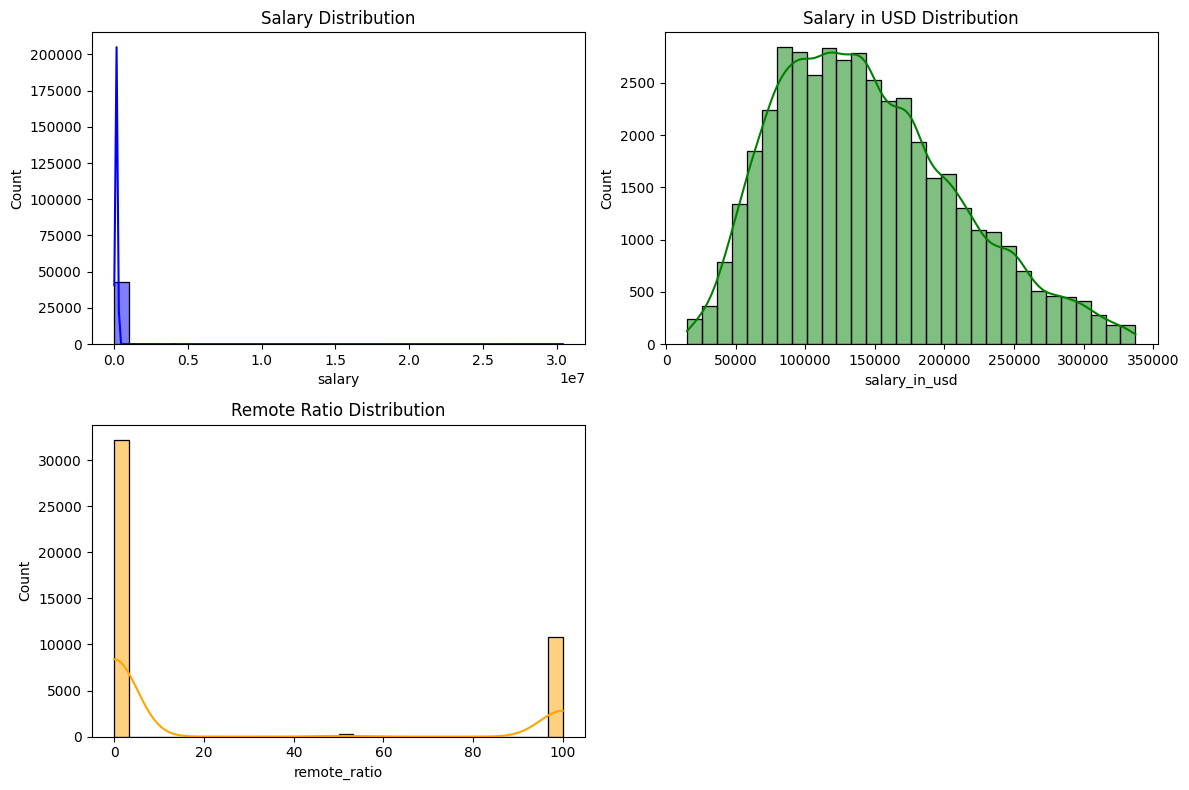

In [132]:
# Visualizing the distribution of salary, salary_in_usd, and remote_ratio
plt.figure(figsize=(12, 8))

# Salary Distribution
plt.subplot(2, 2, 1)
sns.histplot(df_cleaned_no_duplicates['salary'], bins=30, kde=True, color='blue')
plt.title('Salary Distribution')

# Salary in USD Distribution
plt.subplot(2, 2, 2)
sns.histplot(df_cleaned_no_duplicates['salary_in_usd'], bins=30, kde=True, color='green')
plt.title('Salary in USD Distribution')

# Remote Ratio Distribution
plt.subplot(2, 2, 3)
sns.histplot(df_cleaned_no_duplicates['remote_ratio'], bins=30, kde=True, color='orange')
plt.title('Remote Ratio Distribution')

plt.tight_layout()
plt.show()


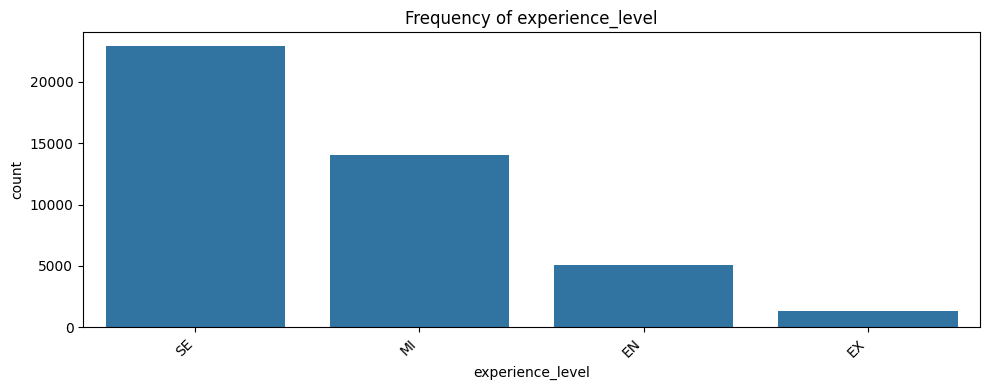

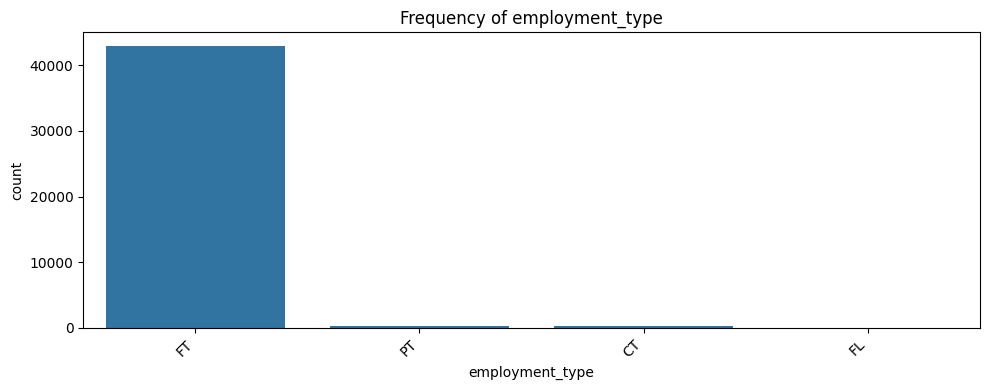

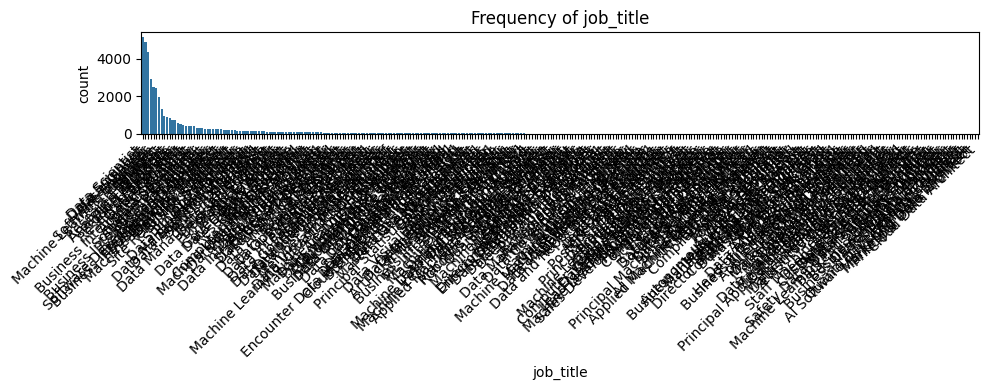

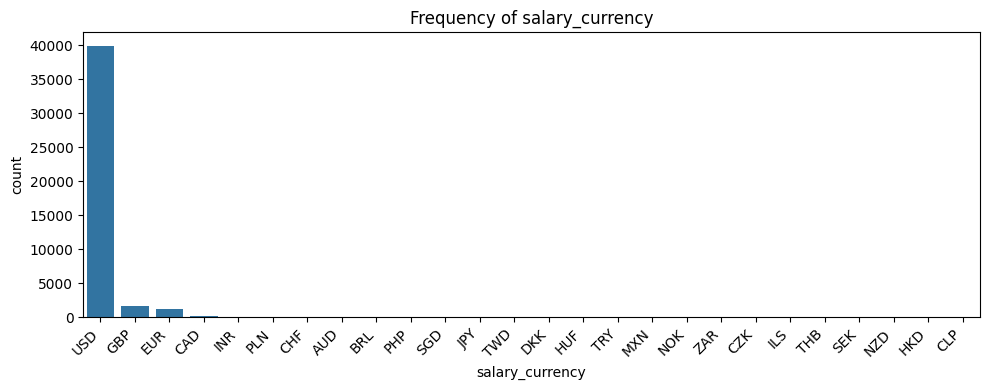

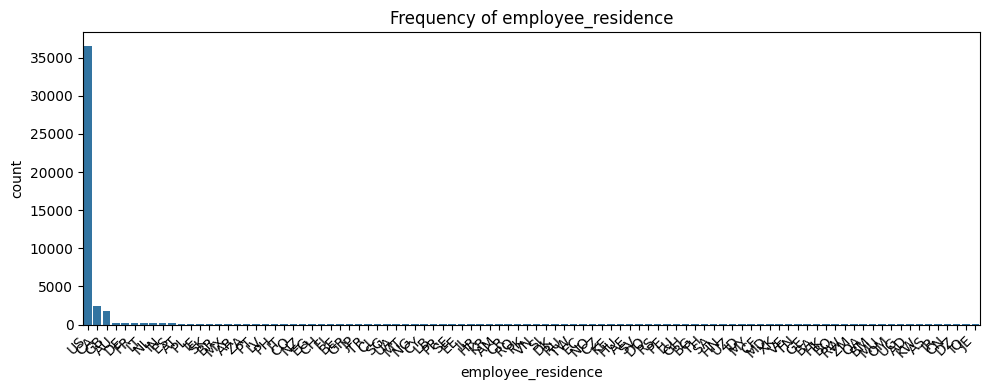

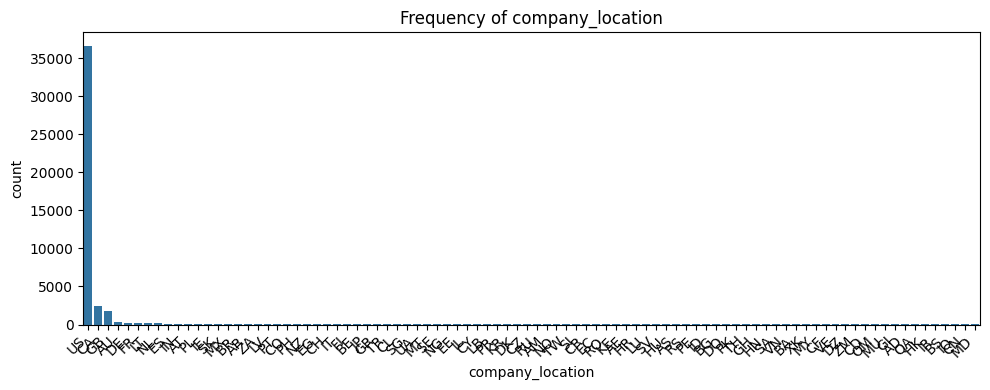

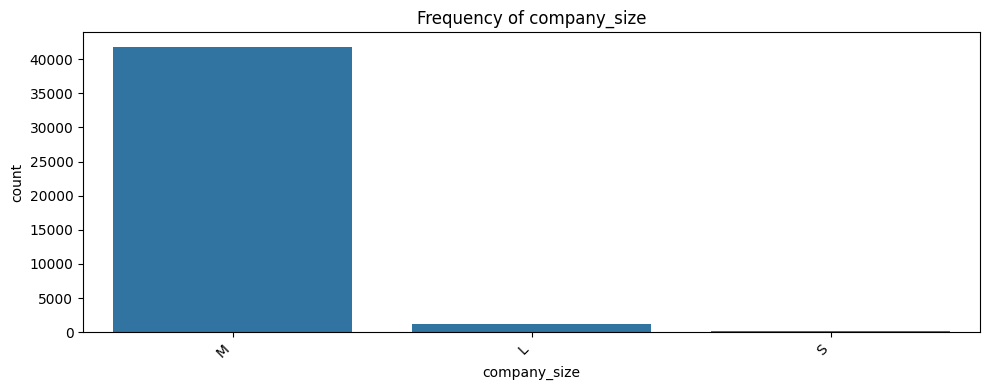

In [133]:
# Visualizing the distribution of categorical variables
# Potential Challenges:
# Too many job titles to visualize, show most popular maybe word plot
# Salary currency distribution hard to visualize

categorical_vars = ['experience_level', 'employment_type', 'job_title', 
                    'salary_currency', 'employee_residence', 
                    'company_location', 'company_size']

for col in categorical_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df_cleaned_no_duplicates, x=col, order=df_cleaned_no_duplicates[col].value_counts().index)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Frequency of {col}')
    plt.tight_layout()
    plt.show()



### Encoding Categorical Variables 
###### We need to encode the categorical variables for ML and feature engineering purposes

In [134]:
# Now clearly we need to encode some of these categorical features, to their numeric counterparts to that they can be properly used for ML and feature engineering
# First we will encode company size with "S" or Small to 1, "M" to 2, "L" to 3 to show order
size_mapping = {'S': 1, 'M': 2, 'L': 3}

df_cleaned_no_duplicates['company_size'] = df_cleaned_no_duplicates['company_size'].map(size_mapping)




/var/folders/bd/06j19vlj6mqc5ppmfpdr0j1c0000gn/T/ipykernel_9448/4149063981.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_no_duplicates['company_size'] = df_cleaned_no_duplicates['company_size'].map(size_mapping)


In [135]:
# We will group similar job titles and rank those groups by average salary.
# This will create a new feature called 'job_title_salary_rank' that can be used in machine learning models.
def encode_and_rank_job_titles(df, n_clusters=10):
    # Step 1: Clean and preprocess the job titles (convert to lowercase, remove punctuation)
    titles = df['job_title'].str.lower().str.replace(r'[^\w\s]', '', regex=True)
    
    # Step 2: Use TF-IDF to convert job titles into numbers based on word importance
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(titles)
    
    # Step 3: Group similar job titles into clusters using KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df['cluster'] = kmeans.fit_predict(tfidf_matrix)
    
    # Step 4: Rank the clusters by their average salary
    avg_salary_by_cluster = df.groupby('cluster')['salary_in_usd'].mean().sort_values(ascending=False)
    cluster_rank = {cluster: rank+1 for rank, cluster in enumerate(avg_salary_by_cluster.index)}
    df['job_title_salary_rank'] = df['cluster'].map(cluster_rank)
    
    
    return df  


df_cleaned_no_duplicates = encode_and_rank_job_titles(df_cleaned_no_duplicates)


print(df_cleaned_no_duplicates.head())


   work_year experience_level employment_type                 job_title  \
0       2025               MI              FT  Customer Success Manager   
1       2025               SE              FT                  Engineer   
2       2025               SE              FT                  Engineer   
3       2025               SE              FT         Applied Scientist   
4       2025               SE              FT         Applied Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   57000             EUR          60000                 NL            50   
1  165000             USD         165000                 US             0   
2  109000             USD         109000                 US             0   
3  294000             USD         294000                 US             0   
4  137600             USD         137600                 US             0   

  company_location  company_size  cluster  job_title_salary_rank  
0               NL 

/var/folders/bd/06j19vlj6mqc5ppmfpdr0j1c0000gn/T/ipykernel_9448/533815296.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(tfidf_matrix)
/var/folders/bd/06j19vlj6mqc5ppmfpdr0j1c0000gn/T/ipykernel_9448/533815296.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_title_salary_rank'] = df['cluster'].map(cluster_rank)


In [136]:
# Mapping the experience levels to numeric values
def encode_experience_level(df):
    experience_mapping = {
        'EN': 1,  # Entry-level / Junior
        'MI': 2,  # Mid-level / Intermediate
        'SE': 3,  # Senior-level / Expert
        'EX': 4   # Executive-level / Director
    }
    
    df['experience_level_encoded'] = df['experience_level'].map(experience_mapping)
    
    return df

df_cleaned_no_duplicates = encode_experience_level(df_cleaned_no_duplicates)

print(df_cleaned_no_duplicates.head())


   work_year experience_level employment_type                 job_title  \
0       2025               MI              FT  Customer Success Manager   
1       2025               SE              FT                  Engineer   
2       2025               SE              FT                  Engineer   
3       2025               SE              FT         Applied Scientist   
4       2025               SE              FT         Applied Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   57000             EUR          60000                 NL            50   
1  165000             USD         165000                 US             0   
2  109000             USD         109000                 US             0   
3  294000             USD         294000                 US             0   
4  137600             USD         137600                 US             0   

  company_location  company_size  cluster  job_title_salary_rank  \
0               NL

/var/folders/bd/06j19vlj6mqc5ppmfpdr0j1c0000gn/T/ipykernel_9448/1498038159.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['experience_level_encoded'] = df['experience_level'].map(experience_mapping)


In [137]:
# Mapping the employment types to numeric values
def encode_employment_type(df):
    employment_mapping = {
        'FT': 1,  # Full-time
        'PT': 2,  # Part-time
        'CT': 3,  # Contract
        'FL': 4   # Freelance
    }
    df['employment_type_encoded'] = df['employment_type'].map(employment_mapping)
    return df

df_cleaned_no_duplicates = encode_employment_type(df_cleaned_no_duplicates)
print(df_cleaned_no_duplicates.head())


   work_year experience_level employment_type                 job_title  \
0       2025               MI              FT  Customer Success Manager   
1       2025               SE              FT                  Engineer   
2       2025               SE              FT                  Engineer   
3       2025               SE              FT         Applied Scientist   
4       2025               SE              FT         Applied Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   57000             EUR          60000                 NL            50   
1  165000             USD         165000                 US             0   
2  109000             USD         109000                 US             0   
3  294000             USD         294000                 US             0   
4  137600             USD         137600                 US             0   

  company_location  company_size  cluster  job_title_salary_rank  \
0               NL

/var/folders/bd/06j19vlj6mqc5ppmfpdr0j1c0000gn/T/ipykernel_9448/57783569.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['employment_type_encoded'] = df['employment_type'].map(employment_mapping)


In [138]:
df_ml_ready = df_cleaned_no_duplicates[['job_title_salary_rank', 'company_size', 'experience_level_encoded', 
                          'employment_type_encoded', 'work_year', 'salary_in_usd']]

df_ml_ready.to_csv('cleaned_data_ready_for_ml.csv', index=False)

print("The cleaned dataset has been saved as 'cleaned_data_ready_for_ml.csv'.")

The cleaned dataset has been saved as 'cleaned_data_ready_for_ml.csv'.
